# Proyek Klasifikasi Gambar: Shoe, Sandal & Boot Image Classification
- **Nama:** Ahmad Hanafi
- **Email:** hanapiahmad07@gmail.com
- **ID Dicoding:** hanafiiahmd

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
import cv2
from skimage.util import random_noise
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [1]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 46.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: ml_dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found exis

## Data Preparation

### Data Loading

In [3]:
from google.colab import files
files.upload()

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"ahmadhanafi777","key":"19e582c5eed46a9c812a1c7519de28f0"}'}

In [5]:
!mv kaggle\ \(3\).json kaggle.json

In [6]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!ls ~/.kaggle

kaggle.json


In [8]:
!kaggle datasets download -d hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images
!unzip shoe-vs-sandal-vs-boot-dataset-15k-images.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1).jpg  
  inflating: dataset/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (10).jpg  
  inflating: dataset/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (100).jpg  
  inflating: dataset/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1000).jpg  
  inflating: dataset/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1001).jpg  
  inflating: dataset/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1002).jpg  
  inflating: dataset/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1003).jpg  
  inflating: dataset/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1004).jpg  
  inflating: dataset/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1005).jpg  
  inflating: dataset/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1006).jpg  
  inflating: dataset/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1007).jpg  
  inflating: dataset/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1008).jpg  
  inflating: dataset/Shoe vs Sandal vs Boot Dataset/Sho

In [9]:
import os
print(os.listdir('.'))

['.config', 'shoe-vs-sandal-vs-boot-dataset-15k-images.zip', 'dataset', 'sample_data']


In [10]:
!ls dataset

'Shoe vs Sandal vs Boot Dataset'


In [11]:
!ls

dataset  sample_data  shoe-vs-sandal-vs-boot-dataset-15k-images.zip


In [13]:
import os

dataset_path = "dataset/Shoe vs Sandal vs Boot Dataset"

classes = os.listdir(dataset_path)
print("Kelas yang ditemukan:", classes)

Kelas yang ditemukan: ['Boot', 'Sandal', 'Shoe']


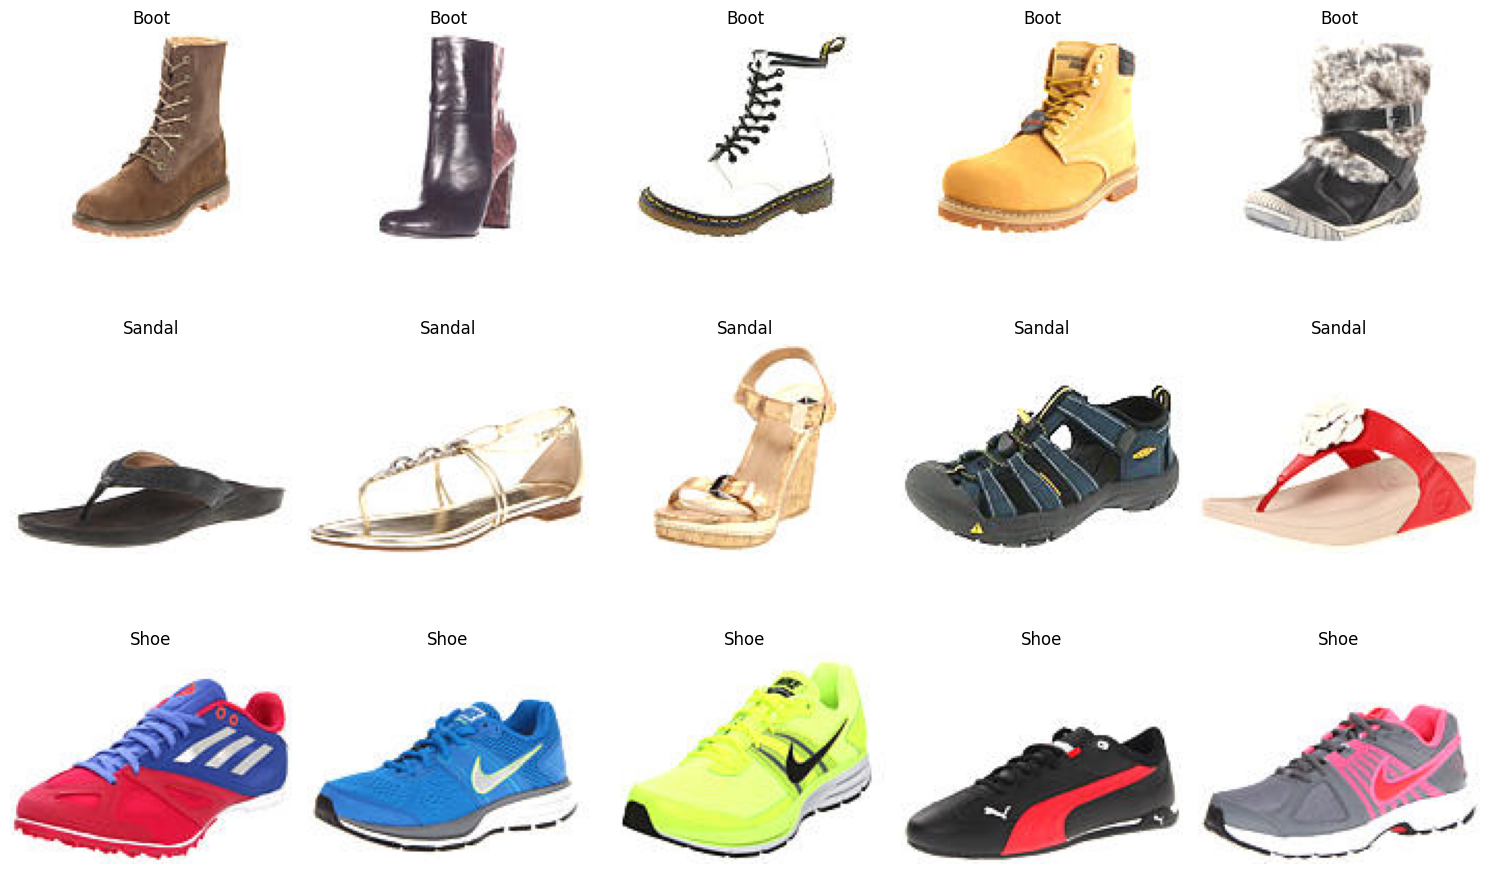

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

fig, axs = plt.subplots(len(classes), 5, figsize=(15, 10))

for row, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    images = os.listdir(class_path)
    selected_images = random.sample(images, 5)

    for col, img_name in enumerate(selected_images):
        img_path = os.path.join(class_path, img_name)
        img = mpimg.imread(img_path)

        axs[row, col].imshow(img)
        axs[row, col].axis('off')
        axs[row, col].set_title(class_name)

plt.tight_layout()
plt.show()

                                                path        file_name labels
0  dataset/Shoe vs Sandal vs Boot Dataset/Boot/bo...  boot (1384).jpg   Boot
1  dataset/Shoe vs Sandal vs Boot Dataset/Boot/bo...  boot (2918).jpg   Boot
2  dataset/Shoe vs Sandal vs Boot Dataset/Boot/bo...   boot (378).jpg   Boot
3  dataset/Shoe vs Sandal vs Boot Dataset/Boot/bo...  boot (1796).jpg   Boot
4  dataset/Shoe vs Sandal vs Boot Dataset/Boot/bo...  boot (3108).jpg   Boot


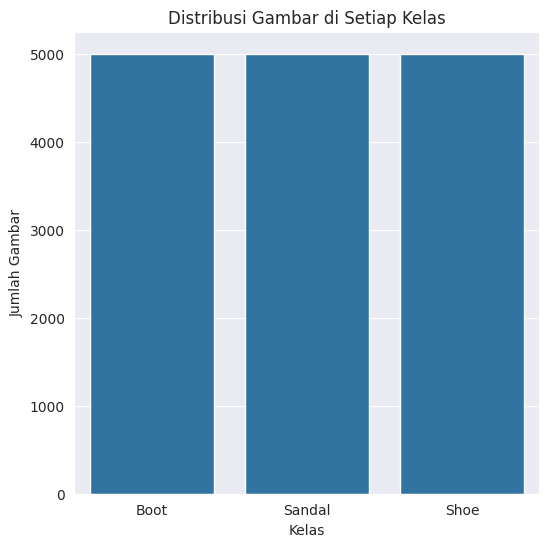

In [16]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset_path = "dataset/Shoe vs Sandal vs Boot Dataset"


file_name = []
labels = []
full_path = []

for path, subdirs, files in os.walk(dataset_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

df = pd.DataFrame({"path": full_path, "file_name": file_name, "labels": labels})

print(df.head())

plt.figure(figsize=(6,6))
sns.set_style("darkgrid")
sns.countplot(x=df["labels"])
plt.title("Distribusi Gambar di Setiap Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Gambar")
plt.show()

In [17]:
from PIL import Image
import os

dataset_path = "dataset/Shoe vs Sandal vs Boot Dataset"

image_sizes = {}

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)

            try:
                with Image.open(img_path) as img:
                    size = img.size

                    if size in image_sizes:
                        image_sizes[size] += 1
                    else:
                        image_sizes[size] = 1
            except:
                print(f"Error membaca {img_path}")

print("Resolusi gambar yang ditemukan dalam dataset:")
for size, count in image_sizes.items():
    print(f"Resolusi {size}: {count} gambar")

Resolusi gambar yang ditemukan dalam dataset:
Resolusi (136, 102): 14998 gambar
Resolusi (135, 102): 2 gambar


### Data Preprocessing

In [18]:
import os
import cv2
import numpy as np
from tqdm.notebook import tqdm as tq
from skimage.transform import resize

# Path dataset asli
dataset_path = "dataset/Shoe vs Sandal vs Boot Dataset"

# Path untuk menyimpan hasil preprocessing
preprocessed_path = "Preprocessed_Dataset"
os.makedirs(preprocessed_path, exist_ok=True)

# Ukuran gambar yang diinginkan
IMG_SIZE = (128, 128)

# Looping setiap kelas (kategori)
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    save_path = os.path.join(preprocessed_path, class_name)
    os.makedirs(save_path, exist_ok=True)

    # Looping setiap gambar dalam kelas
    for img_name in tq(os.listdir(class_path), desc=f"Processing {class_name}"):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi ke RGB
        img = resize(img, IMG_SIZE)  # Resize gambar
        img = img.astype(np.float32) / 255.0  # Normalisasi ke [0,1]

        # Simpan gambar yang telah diproses
        save_img_path = os.path.join(save_path, img_name)
        cv2.imwrite(save_img_path, (img * 255).astype(np.uint8))

Processing Boot:   0%|          | 0/5000 [00:00<?, ?it/s]

Processing Sandal:   0%|          | 0/5000 [00:00<?, ?it/s]

Processing Shoe:   0%|          | 0/5000 [00:00<?, ?it/s]

In [19]:
import numpy as np

img = np.clip(img, 0, 1)

In [20]:
print(f"Tipe Data: {img.dtype}, Shape: {img.shape}")

Tipe Data: float32, Shape: (128, 128, 3)


In [21]:
import os
import cv2
import numpy as np
import random
from tqdm.notebook import tqdm as tq
from tensorflow.keras.preprocessing.image import ImageDataGenerator

preprocessed_path = "Preprocessed_Dataset"

augmented_path = "Augmented_Dataset"
os.makedirs(augmented_path, exist_ok=True)

augmentasi_persen = 0.2  # Augmentasi 20% dari gambar per kelas

augmentasi = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Loop setiap kelas dalam dataset
for class_name in os.listdir(preprocessed_path):
    class_path = os.path.join(preprocessed_path, class_name)
    save_path = os.path.join(augmented_path, class_name)
    os.makedirs(save_path, exist_ok=True)

    img_list = os.listdir(class_path)
    total_img = len(img_list)
    num_augmented = max(10, int(total_img * augmentasi_persen))

    # Pilih gambar secara acak untuk diaugmentasi
    selected_imgs = random.sample(img_list, num_augmented)

    for img_name in tq(selected_imgs, desc=f"Augmenting {class_name}"):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi ke RGB
        img = np.expand_dims(img, axis=0)  # Tambahkan dimensi batch
        aug_iter = augmentasi.flow(img, batch_size=1)  # Generate gambar baru

        # Simpan 1 versi augmentasi dari gambar ini
        aug_img = next(aug_iter)[0] * 255
        aug_img = aug_img.astype(np.uint8)
        save_img_path = os.path.join(save_path, f"aug_{img_name}")
        cv2.imwrite(save_img_path, aug_img)

Augmenting Boot:   0%|          | 0/1000 [00:00<?, ?it/s]

Augmenting Sandal:   0%|          | 0/1000 [00:00<?, ?it/s]

Augmenting Shoe:   0%|          | 0/1000 [00:00<?, ?it/s]

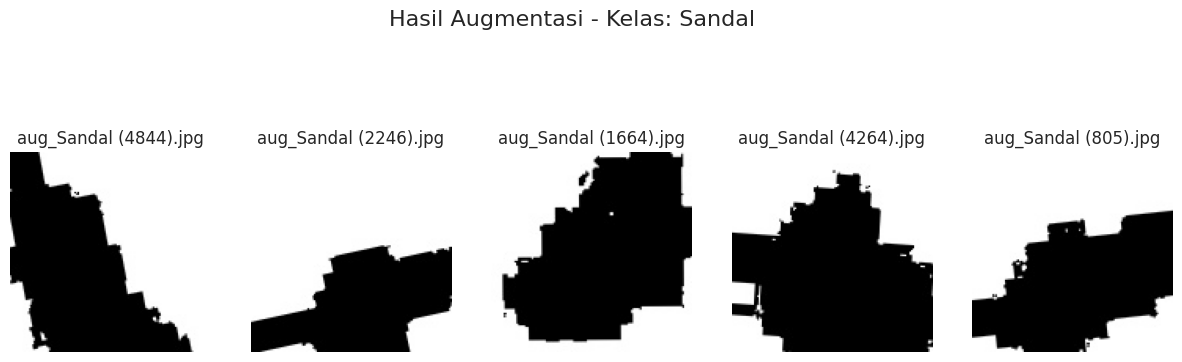

In [22]:
import matplotlib.pyplot as plt
import random

# Pilih salah satu kelas secara acak
augmented_classes = os.listdir(augmented_path)
chosen_class = random.choice(augmented_classes)
class_path = os.path.join(augmented_path, chosen_class)

# Pilih beberapa gambar dari kelas tersebut
augmented_images = random.sample(os.listdir(class_path), min(5, len(os.listdir(class_path))))

# Tampilkan gambar hasil augmentasi
fig, axes = plt.subplots(1, len(augmented_images), figsize=(15, 5))
fig.suptitle(f"Hasil Augmentasi - Kelas: {chosen_class}", fontsize=16)

for i, img_name in enumerate(augmented_images):
    img = cv2.imread(os.path.join(class_path, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(img_name)

plt.show()

#### Split Dataset

In [23]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image

# Path dataset hasil preprocessing
preprocessed_path = "Preprocessed_Dataset"

# Buat list untuk menyimpan path gambar dan label
image_paths = []
labels = []
classes = os.listdir(preprocessed_path)

for class_name in classes:
    class_path = os.path.join(preprocessed_path, class_name)
    for img_name in os.listdir(class_path):
        image_paths.append(os.path.join(class_path, img_name))
        labels.append(class_name)

# Konversi label ke format numerik
label_to_index = {class_name: idx for idx, class_name in enumerate(classes)}
numeric_labels = [label_to_index[label] for label in labels]

# Split dataset (80% train, 10% validation, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(image_paths, numeric_labels, test_size=0.2, stratify=numeric_labels, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [24]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def load_images(image_paths):
    images = [img_to_array(load_img(img_path, target_size=(128, 128))) / 255.0 for img_path in image_paths]
    return np.array(images)

# Konversi X_train, X_val, X_test dari path menjadi array gambar
X_train = load_images(X_train)
X_val = load_images(X_val)
X_test = load_images(X_test)

# Konversi label menjadi array numpy
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

## Modelling

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Definisikan callback
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6),
    EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
]

# Bangun model CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(classes), activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Latih model dengan callback
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=callbacks
)

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.6381 - loss: 0.7192 - val_accuracy: 0.8587 - val_loss: 0.3729 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.8439 - loss: 0.3821 - val_accuracy: 0.8687 - val_loss: 0.3332 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8872 - loss: 0.2929 - val_accuracy: 0.9187 - val_loss: 0.2277 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9052 - loss: 0.2374 - val_accuracy: 0.9020 - val_loss: 0.2525 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9190 - loss: 0.2180 - val_accuracy: 0.9233 - val_loss: 0.2071 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9275 - loss: 0.1923 - val_accuracy: 0.9147 - val_loss: 0.2142 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9332 - loss

## Evaluasi dan Visualisasi

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


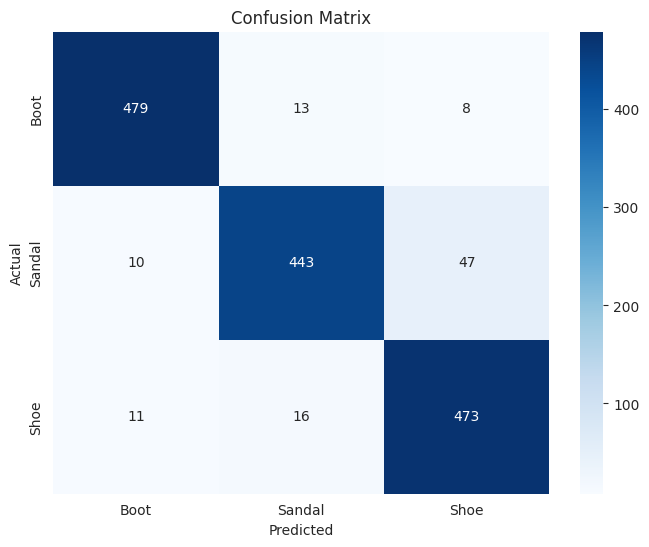

Classification Report:
               precision    recall  f1-score   support

        Boot       0.96      0.96      0.96       500
      Sandal       0.94      0.89      0.91       500
        Shoe       0.90      0.95      0.92       500

    accuracy                           0.93      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       0.93      0.93      0.93      1500



In [26]:
# Prediksi kelas untuk confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=classes)
print("Classification Report:\n", class_report)

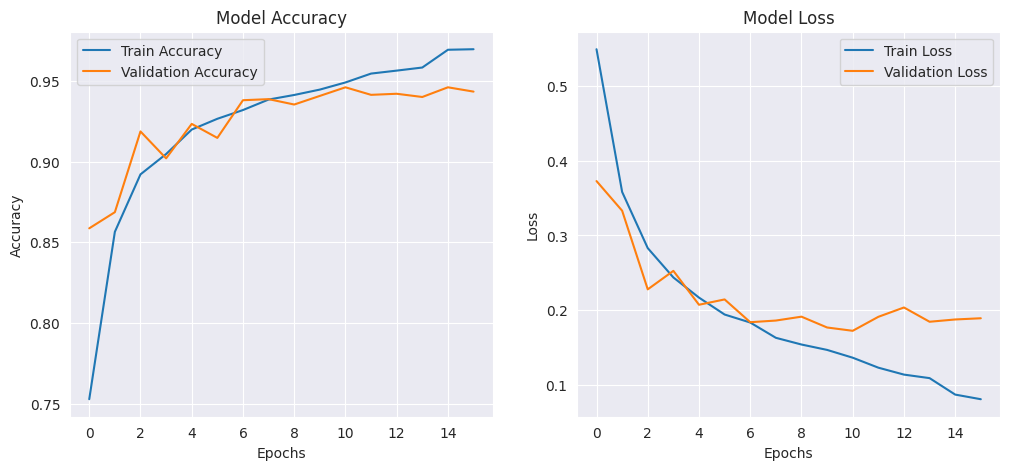

In [27]:
# Plot akurasi dan loss
plt.figure(figsize=(12, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

## Konversi Model

In [28]:
# Simpan model dalam berbagai format

#Saved Model
save_path = '/content/models/'
saved_model_path = os.path.join(save_path, 'saved_model')
os.makedirs(saved_model_path, exist_ok=True)
tf.saved_model.save(model, saved_model_path)

model.save("model.h5")  # Format h5

# Konversi ke TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

# Konversi ke TensorFlow.js
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

Saved artifact at '/tmp/tmpr9k4f9_q'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(32, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(32, 3), dtype=tf.float32, name=None)
Captures:
  139459390932752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139459390940240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139459390940432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139459390941584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139459390940816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139459390942736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139459390942352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139459390943312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139459390944272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139459390945232: TensorSpec(shape=(), dtype=tf.resource, name=None)
2025-03-21 03:57:43.

## Inference (Optional)

In [37]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load model dari SavedModel
saved_model_path = "/content/models/saved_model"
model = tf.saved_model.load(saved_model_path)
infer = model.signatures["serving_default"]

# Load dan preprocess gambar
image_path = "g8041_EXTRALARGE.jpg"
img = Image.open(image_path).convert("RGB")
img = img.resize((128, 128))
img_array = np.array(img, dtype=np.float32) / 255.0

batch_size = 32
dummy_batch = np.zeros((batch_size, 128, 128, 3), dtype=np.float32)
dummy_batch[0] = img_array

# Lakukan prediksi
output_data = infer(inputs=tf.constant(dummy_batch))

output_data = output_data['output_0'].numpy()[0]

class_labels = ["Shoe", "Sandal", "Boot"]
predicted_class = class_labels[np.argmax(output_data)]

print(f"Output prediksi: {predicted_class}")

Output prediksi: Boot


In [32]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load model dari SavedModel
saved_model_path = "/content/models/saved_model"
model = tf.saved_model.load(saved_model_path)
infer = model.signatures["serving_default"]

# Load dan preprocess gambar
image_path = "BK_05170_BRN2.jpg"
img = Image.open(image_path).convert("RGB")
img = img.resize((128, 128))
img_array = np.array(img, dtype=np.float32) / 255.0

batch_size = 32
dummy_batch = np.zeros((batch_size, 128, 128, 3), dtype=np.float32)
dummy_batch[0] = img_array

# Lakukan prediksi
output_data = infer(inputs=tf.constant(dummy_batch))

output_data = output_data['output_0'].numpy()[0]

class_labels = ["Shoe", "Sandal", "Boot"]
predicted_class = class_labels[np.argmax(output_data)]

print(f"Output prediksi: {predicted_class}")

Output prediksi: Sandal
